In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_dir = r'C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\augmented_images\spiral\training'
test_dir = r'C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\spiral\testing'

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  
    validation_split=0.2,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary',  
    subset='training',
    shuffle=True  
)

Found 287 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
)

Found 71 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=8,
    class_mode='binary',  
    shuffle=False
)

Found 30 images belonging to 2 classes.


In [7]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D,Resizing
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [8]:
model1 = Sequential([
    Resizing(224, 224),
    base_model,  
    GlobalAveragePooling2D(),  
    Dense(64, activation='relu'),  
    Dropout(0.5),  
    Dense(1, activation='sigmoid')  
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [9]:
history1 = model1.fit(
    train_generator,
    epochs=30,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30


c:\Users\HP-NBT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 112s 12s/step - accuracy: 0.6113 - loss: 0.6556 - val_accuracy: 0.8028 - val_loss: 0.6085
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 114s 13s/step - accuracy: 0.5623 - loss: 0.6832 - val_accuracy: 0.7887 - val_loss: 0.5749
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 104s 12s/step - accuracy: 0.6504 - loss: 0.6214 - val_accuracy: 0.7887 - val_loss: 0.5423
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 121s 13s/step - accuracy: 0.7884 - loss: 0.5404 - val_accuracy: 0.8028 - val_loss: 0.5141
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 111s 12s/step - accuracy: 0.7540 - loss: 0.5499 - val_accuracy: 0.8310 - val_loss: 0.4887
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 115s 13s/step - accuracy: 0.7256 - loss: 0.5646 - val_accuracy: 0.8451 - val_loss: 0.4738
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 108s 12s/step - accuracy: 0.7862 - loss: 0.5045 - val_accuracy: 0.8169 - val_loss: 0.4692
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 104s 11s/step - accuracy: 0.7983 - loss: 0.4865 - val_accuracy: 0.8310 - val_loss: 0.4580
Epo

In [10]:
test_loss, test_acc = model1.evaluate(test_generator) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8450 - loss: 0.4868


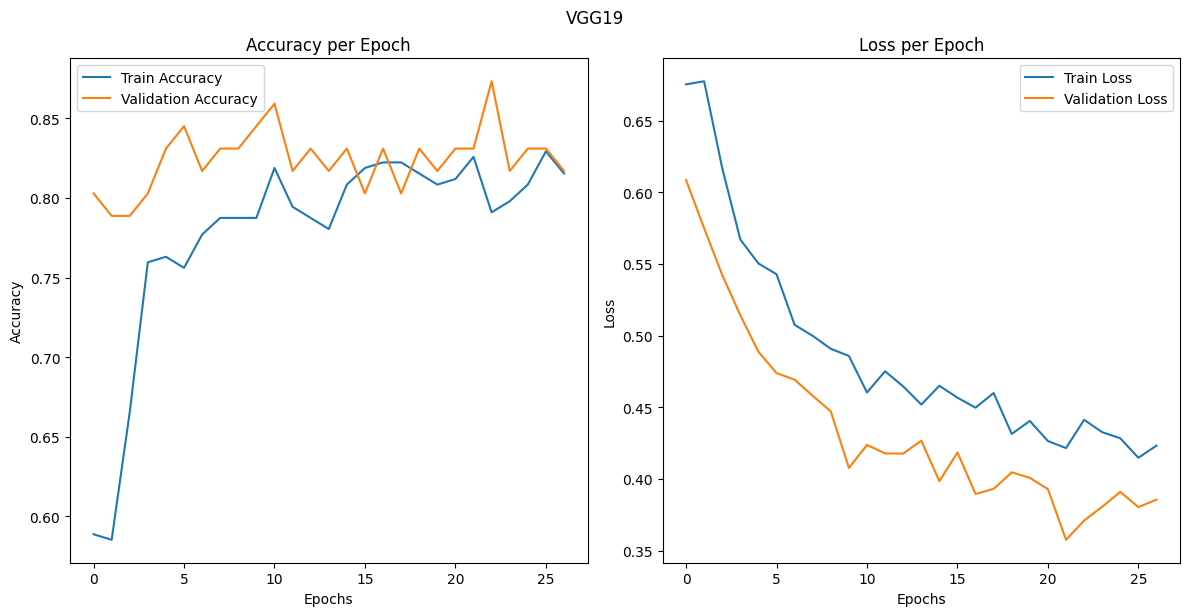

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(history1.history['accuracy'], label='Train Accuracy')
axs[0].plot(history1.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history1.history['loss'], label='Train Loss')
axs[1].plot(history1.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("VGG19", y=1.02, fontsize=12)
plt.show()

In [12]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model_inception.trainable = False

In [13]:
model3 = Sequential([
    Resizing(299, 299),
    base_model_inception,  
    GlobalAveragePooling2D(),  
    Dense(128, activation='relu'),  
    Dropout(0.5),  
    Dense(1, activation='sigmoid')  
])

In [14]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history3 = model3.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
    #callbacks=[early_stopping]
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - accuracy: 0.5793 - loss: 0.7568 - val_accuracy: 0.8028 - val_loss: 0.4779
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.6899 - loss: 0.6009 - val_accuracy: 0.7887 - val_loss: 0.4323
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7167 - loss: 0.5103 - val_accuracy: 0.8451 - val_loss: 0.3923
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7488 - loss: 0.4746 - val_accuracy: 0.8592 - val_loss: 0.3760
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 42s 5s/step - accuracy: 0.7863 - loss: 0.4521 - val_accuracy: 0.8592 - val_loss: 0.3422
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8214 - loss: 0.4186 - val_accuracy: 0.8169 - val_loss: 0.3650
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 4s/step - accuracy: 0.8319 - loss: 0.4058 - val_accuracy: 0.8732 - val_loss: 0.3328
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.7948 - loss: 0.4479 - val_accuracy: 0.8451 - val_loss: 0.3518
Epoch 9/

In [16]:
test_loss, test_acc = model3.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 817ms/step - accuracy: 0.8200 - loss: 0.5762


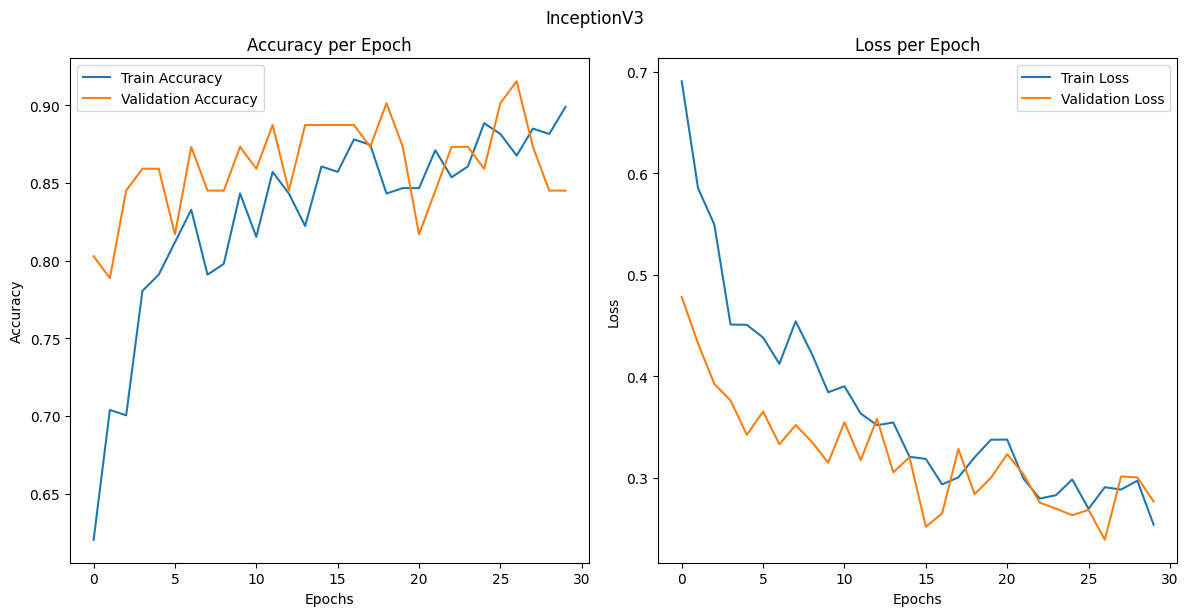

In [17]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history3.history['accuracy'], label='Train Accuracy')
axs[0].plot(history3.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history3.history['loss'], label='Train Loss')
axs[1].plot(history3.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("InceptionV3", y=1.02, fontsize=12)
plt.show()

In [18]:
from tensorflow.keras.applications import DenseNet121

base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model_densenet.trainable = False

model4 = Sequential([
    base_model_densenet,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

In [19]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history4 = model4.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.5030 - loss: 1.1820 - val_accuracy: 0.6056 - val_loss: 0.7056
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.6747 - loss: 0.6591 - val_accuracy: 0.7324 - val_loss: 0.5157
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7541 - loss: 0.5052 - val_accuracy: 0.7887 - val_loss: 0.4280
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8196 - loss: 0.4256 - val_accuracy: 0.8592 - val_loss: 0.3863
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8031 - loss: 0.4250 - val_accuracy: 0.8592 - val_loss: 0.4189
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8266 - loss: 0.3895 - val_accuracy: 0.8732 - val_loss: 0.3669
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8811 - loss: 0.3252 - val_accuracy: 0.8169 - val_loss: 0.4086
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8214 - loss: 0.3281 - val_accuracy: 0.8732 - val_loss: 0.3596
Epoch 9/

In [21]:
test_loss, test_acc = model4.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 441ms/step - accuracy: 0.8317 - loss: 0.5377


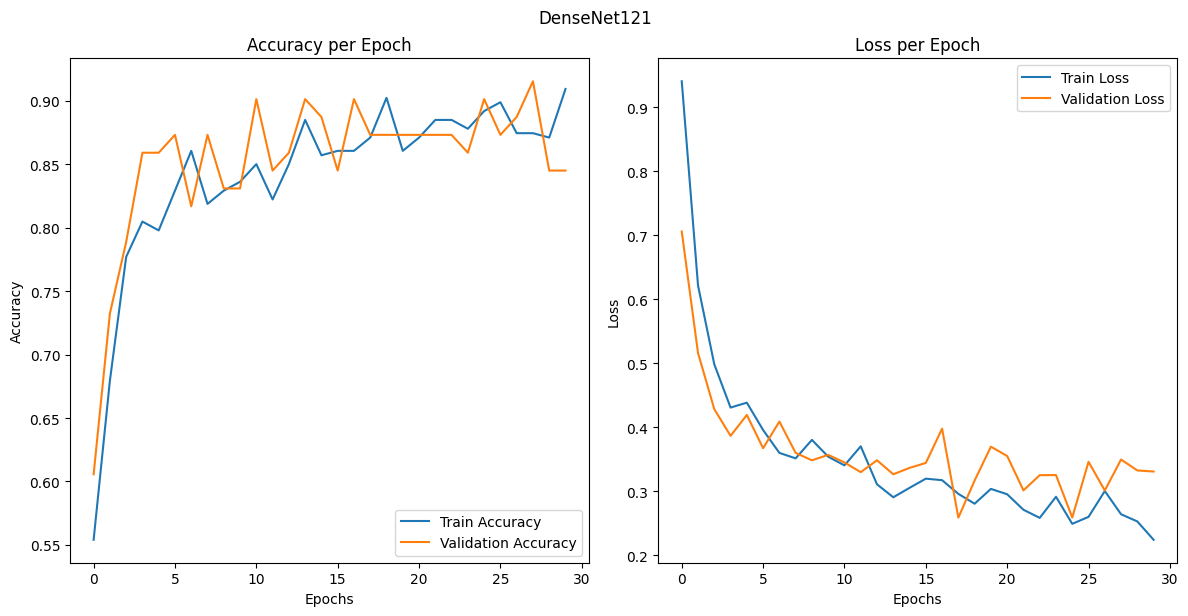

In [22]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history4.history['accuracy'], label='Train Accuracy')
axs[0].plot(history4.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history4.history['loss'], label='Train Loss')
axs[1].plot(history4.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("DenseNet121", y=1.02, fontsize=12)
plt.show()

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Concatenate, Lambda
from tensorflow.keras.models import Model

input_shape = (150, 150, 3)
input_layer = Input(shape=input_shape)

# Resize images to 224x224 before feeding into models
resize_layer = Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_layer)

vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  
vgg_output = vgg_base(resize_layer)  # Pass resized input through VGG19
vgg_features = GlobalAveragePooling2D()(vgg_output)  # Extract features

inc_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inc_base.trainable = False  
inc_output = inc_base(resize_layer)  # Pass resized input through InceptionV3
inc_features = GlobalAveragePooling2D()(inc_output)  # Extract features

# Merge features from both models
merged = Concatenate()([vgg_features, inc_features])

x = Dense(256, activation='relu')(merged)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x)  

model5 = Model(inputs=input_layer, outputs=output_layer)
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Train the model
history5 = model5.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15
    #callbacks=[early_stopping]
)

Epoch 1/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 160s 16s/step - accuracy: 0.5666 - loss: 1.2592 - val_accuracy: 0.4930 - val_loss: 1.0730
Epoch 2/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 129s 14s/step - accuracy: 0.6138 - loss: 0.9358 - val_accuracy: 0.6479 - val_loss: 0.7158
Epoch 3/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 123s 14s/step - accuracy: 0.6388 - loss: 0.7601 - val_accuracy: 0.7465 - val_loss: 0.4451
Epoch 4/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 115s 13s/step - accuracy: 0.6808 - loss: 0.5602 - val_accuracy: 0.8310 - val_loss: 0.4455
Epoch 5/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 116s 13s/step - accuracy: 0.7595 - loss: 0.4958 - val_accuracy: 0.8028 - val_loss: 0.4207
Epoch 6/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 115s 13s/step - accuracy: 0.7887 - loss: 0.4714 - val_accuracy: 0.8451 - val_loss: 0.4295
Epoch 7/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 115s 13s/step - accuracy: 0.8016 - loss: 0.4225 - val_accuracy: 0.8592 - val_loss: 0.3506
Epoch 8/15
9/9 ━━━━━━━━━━━━━━━━━━━━ 115s 13s/step - accuracy: 0.7907 - loss: 0.4430 - val_accuracy: 0.8592 - val_loss:

In [25]:
# Evaluate the model on the test set
test_loss, test_acc = model5.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8075 - loss: 0.5551


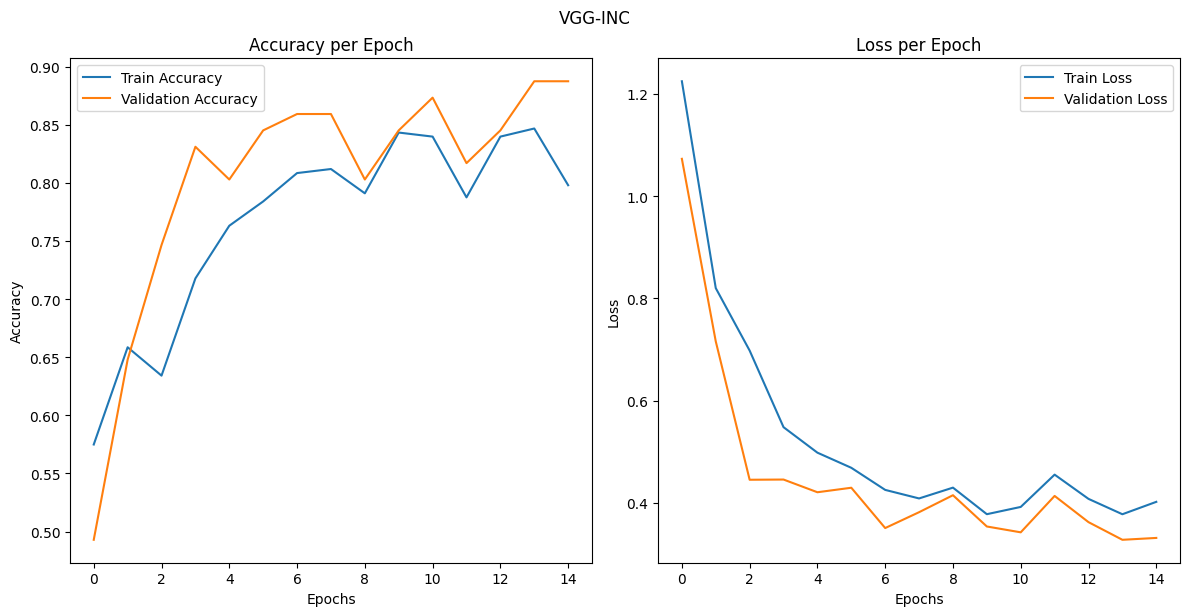

In [26]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot accuracy
axs[0].plot(history5.history['accuracy'], label='Train Accuracy')
axs[0].plot(history5.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss
axs[1].plot(history5.history['loss'], label='Train Loss')
axs[1].plot(history5.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("VGG-INC", y=1.02, fontsize=12)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step 
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 620ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002533559EF20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 13463s 5s/step   


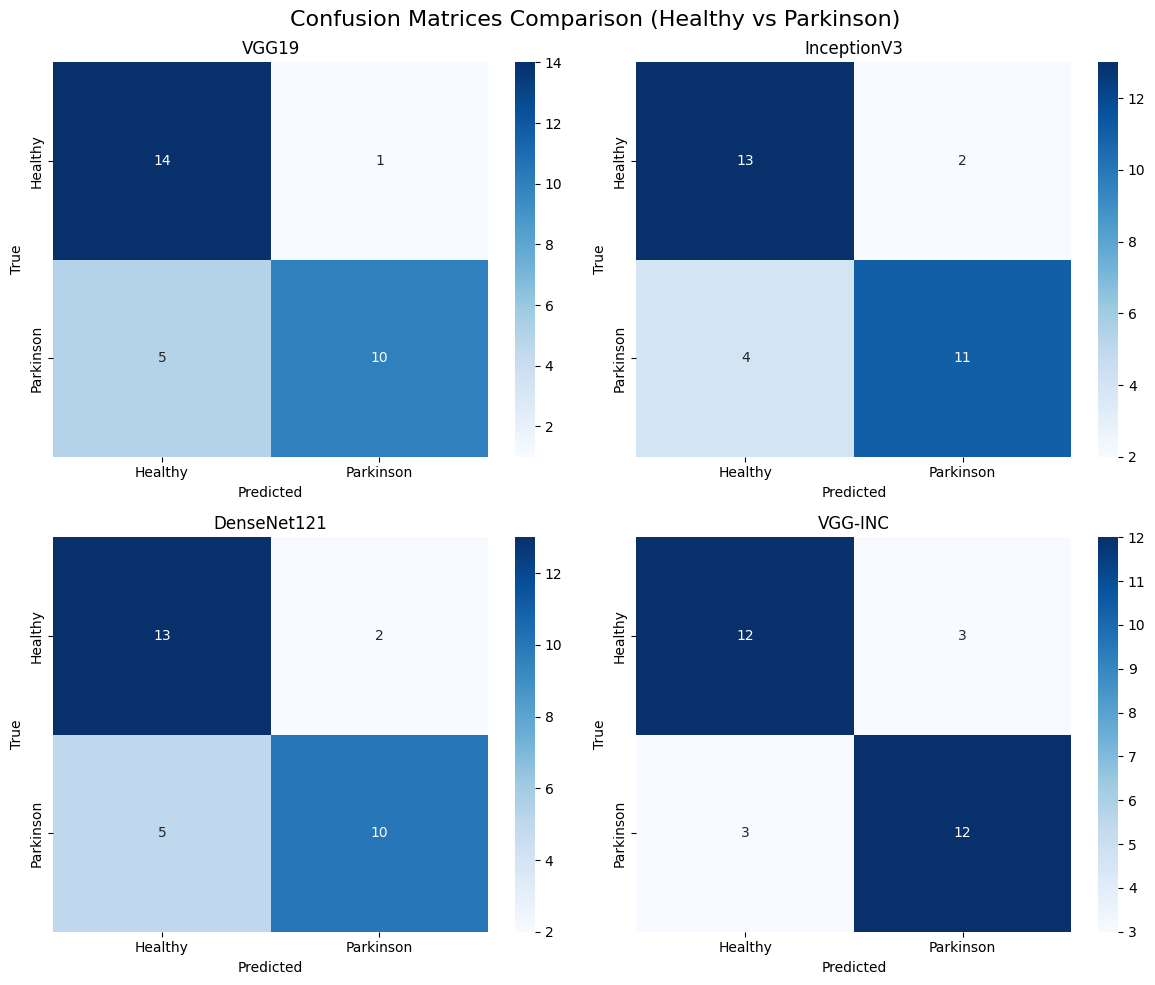

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Reset test generator to ensure consistent order
test_generator.reset()

# Get true labels
y_true = test_generator.classes

# Function to get predictions (binary classification)
def get_predictions(model, generator):
    generator.reset()
    y_pred = model.predict(generator)
    return (y_pred > 0.5).astype(int)  # Binary threshold

# Get predictions for all models
y_pred1 = get_predictions(model1, test_generator).flatten()
y_pred3 = get_predictions(model3, test_generator).flatten()
y_pred4 = get_predictions(model4, test_generator).flatten()
y_pred5 = get_predictions(model5, test_generator).flatten()

# Compute confusion matrices
cm1 = confusion_matrix(y_true, y_pred1)
cm3 = confusion_matrix(y_true, y_pred3)
cm4 = confusion_matrix(y_true, y_pred4)
cm5 = confusion_matrix(y_true, y_pred5)

# Create 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices Comparison (Healthy vs Parkinson)', fontsize=16)

# Plot each confusion matrix
def plot_cm(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Healthy', 'Parkinson'], 
                yticklabels=['Healthy', 'Parkinson'],
                ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

plot_cm(cm1, axes[0, 0], 'VGG19')
plot_cm(cm3, axes[0, 1], 'InceptionV3')
plot_cm(cm4, axes[1, 0], 'DenseNet121')
plot_cm(cm5, axes[1, 1], 'VGG-INC')

plt.tight_layout()
plt.show()


In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, img_path):
    # Automatically determine required input size from the model
    target_size = model.input_shape[1:3]

    # Load and preprocess image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    # Make prediction
    prediction = model.predict(img_array_exp)

    # Interpret result
    result = "Parkinson" if prediction >= 0.5 else "Healthy"
    confidence = prediction[0][0] if prediction >= 0.5 else 1 - prediction[0][0]

    # Show image with prediction
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"{result} (Confidence: {confidence:.2f})", fontsize=14)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


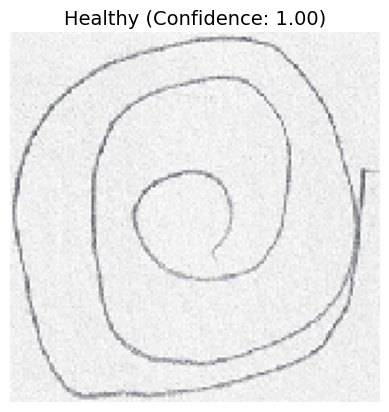

In [29]:
img_path = r"C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\spiral\testing\healthy\V09HE01.png" 
predict_image(model3, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


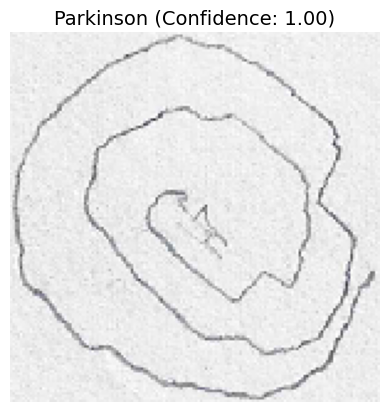

In [39]:
img_path = r"C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\spiral\testing\parkinson\V05PE01.png"  
predict_image(model3, img_path)

In [40]:
import numpy as np
import lime
from lime import lime_image
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image


In [41]:
def predict_fn(imgs):
    imgs = np.array(imgs)
    preds = model3.predict(imgs)  # Use your trained InceptionV3 model
    return preds

In [43]:
img_path = r"C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\spiral\testing\parkinson\V05PE01.png"  
img = image.load_img(img_path, target_size=(299, 299))  
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)  

In [44]:
# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    img_array[0].astype('double'),  # Convert to double precision
    predict_fn,
    top_labels=2,  # Binary classification (Healthy vs. Parkinson’s)
    hide_color=0,
    num_samples=1000  # More samples = more stable explanation
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  2%|▏         | 19/1000 [00:01<01:14, 13.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step


  2%|▎         | 25/1000 [00:02<01:58,  8.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step


  3%|▎         | 30/1000 [00:03<02:17,  7.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  4%|▍         | 45/1000 [00:05<01:46,  8.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  5%|▌         | 50/1000 [00:06<02:27,  6.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step


  7%|▋         | 69/1000 [00:07<01:23, 11.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 912ms/step


  7%|▋         | 73/1000 [00:09<01:54,  8.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 89/1000 [00:10<01:24, 10.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


  9%|▉         | 94/1000 [00:11<01:53,  7.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 107/1000 [00:13<01:45,  8.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 11%|█         | 111/1000 [00:14<02:26,  6.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 12%|█▏        | 120/1000 [00:16<02:27,  5.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 13%|█▎        | 130/1000 [00:17<02:16,  6.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


 14%|█▍        | 140/1000 [00:18<01:55,  7.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 16%|█▌        | 155/1000 [00:19<01:31,  9.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


 16%|█▌        | 160/1000 [00:21<01:54,  7.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 831ms/step


 17%|█▋        | 170/1000 [00:22<01:41,  8.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 18%|█▊        | 180/1000 [00:23<01:45,  7.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 20%|█▉        | 197/1000 [00:24<01:21,  9.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 207/1000 [00:26<01:25,  9.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 21%|██        | 211/1000 [00:27<02:00,  6.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


 22%|██▏       | 220/1000 [00:28<01:48,  7.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 795ms/step


 23%|██▎       | 230/1000 [00:29<01:34,  8.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▍       | 249/1000 [00:31<01:12, 10.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 25%|██▌       | 253/1000 [00:32<01:40,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 266/1000 [00:34<01:26,  8.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 278/1000 [00:35<01:17,  9.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 28%|██▊       | 282/1000 [00:37<01:53,  6.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 29%|██▉       | 290/1000 [00:38<01:57,  6.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 30%|███       | 300/1000 [00:39<01:51,  6.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 319/1000 [00:41<01:12,  9.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 846ms/step


 32%|███▏      | 323/1000 [00:42<01:29,  7.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 873ms/step


 33%|███▎      | 330/1000 [00:43<01:30,  7.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▍      | 348/1000 [00:45<01:06,  9.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 35%|███▌      | 352/1000 [00:46<01:32,  6.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 36%|███▋      | 365/1000 [00:47<01:18,  8.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 37%|███▋      | 370/1000 [00:49<01:39,  6.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 389/1000 [00:50<01:03,  9.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 39%|███▉      | 393/1000 [00:52<01:27,  6.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 407/1000 [00:53<01:08,  8.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 41%|████      | 411/1000 [00:54<01:32,  6.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step


 42%|████▏     | 420/1000 [00:55<01:22,  7.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 787ms/step


 43%|████▎     | 430/1000 [00:56<01:10,  8.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▍     | 449/1000 [00:58<00:50, 10.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 45%|████▌     | 453/1000 [00:59<01:10,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 47%|████▋     | 467/1000 [01:01<00:58,  9.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 478/1000 [01:02<00:56,  9.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 48%|████▊     | 482/1000 [01:03<01:20,  6.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 877ms/step


 49%|████▉     | 490/1000 [01:04<01:15,  6.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


 50%|█████     | 500/1000 [01:05<01:03,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 51%|█████     | 510/1000 [01:07<01:02,  7.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 520/1000 [01:08<01:02,  7.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 538/1000 [01:10<00:47,  9.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 541/1000 [01:11<01:07,  6.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


 56%|█████▌    | 557/1000 [01:12<00:45,  9.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 827ms/step


 56%|█████▌    | 561/1000 [01:13<00:56,  7.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 570/1000 [01:15<00:58,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 585/1000 [01:16<00:47,  8.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 59%|█████▉    | 590/1000 [01:17<01:00,  6.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 60%|██████    | 600/1000 [01:19<00:56,  7.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 62%|██████▏   | 619/1000 [01:20<00:37, 10.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 857ms/step


 62%|██████▏   | 623/1000 [01:21<00:46,  8.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 808ms/step


 63%|██████▎   | 630/1000 [01:22<00:46,  7.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 640/1000 [01:23<00:46,  7.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 658/1000 [01:25<00:34,  9.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 662/1000 [01:26<00:46,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 67%|██████▋   | 670/1000 [01:28<00:48,  6.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step


 68%|██████▊   | 680/1000 [01:29<00:42,  7.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step


 70%|██████▉   | 698/1000 [01:30<00:27, 10.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 701/1000 [01:31<00:40,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 710/1000 [01:32<00:41,  7.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 720/1000 [01:34<00:39,  7.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 738/1000 [01:35<00:28,  9.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 74%|███████▍  | 742/1000 [01:37<00:38,  6.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 758/1000 [01:39<00:28,  8.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 762/1000 [01:40<00:38,  6.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 78%|███████▊  | 779/1000 [01:42<00:26,  8.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 783/1000 [01:43<00:35,  6.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 799/1000 [01:45<00:24,  8.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|████████  | 804/1000 [01:47<00:32,  5.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 819/1000 [01:49<00:23,  7.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 82%|████████▏ | 824/1000 [01:50<00:30,  5.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 839/1000 [01:52<00:21,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 84%|████████▍ | 844/1000 [01:53<00:26,  5.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 857/1000 [01:55<00:20,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 868/1000 [01:57<00:17,  7.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 87%|████████▋ | 872/1000 [01:59<00:24,  5.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 888/1000 [02:00<00:14,  7.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 892/1000 [02:02<00:19,  5.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 907/1000 [02:04<00:13,  7.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 919/1000 [02:06<00:10,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 924/1000 [02:07<00:13,  5.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 938/1000 [02:09<00:08,  7.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 942/1000 [02:11<00:10,  5.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▌| 959/1000 [02:12<00:04,  8.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 96%|█████████▋| 964/1000 [02:13<00:05,  6.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 978/1000 [02:15<00:02,  8.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 98%|█████████▊| 982/1000 [02:16<00:02,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


100%|█████████▉| 995/1000 [02:18<00:00,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|██████████| 1000/1000 [02:20<00:00,  7.13it/s]


In [50]:
# Visualize LIME explanation
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  # Class with highest probability (Healthy or Parkinson's)
    positive_only=False,  # Show both supporting and opposing features
    num_features=10,  # Number of important regions to highlight
    hide_rest=False
)

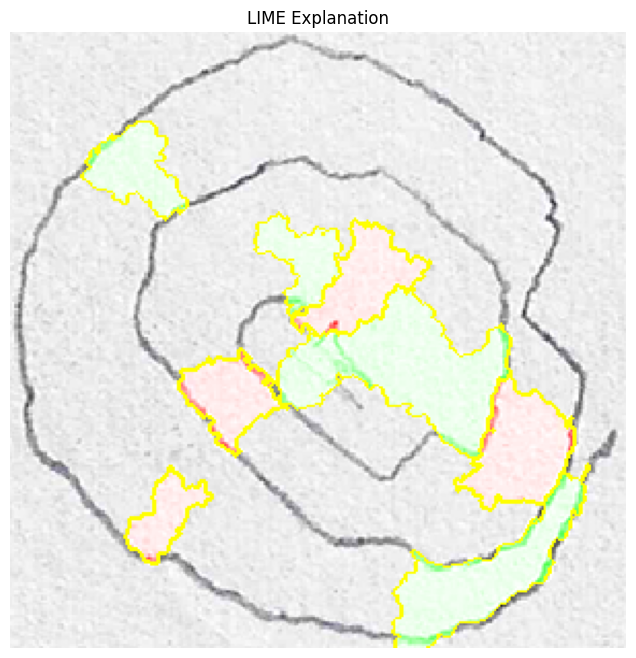

In [51]:
# Show the image with highlighted explanations
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.axis("off")
plt.show()

In [37]:
model3.save('inc_spiral.keras')